In [171]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Load and Preview CSV data

In [172]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [173]:
train_data.head(2)
train_data['Cabin'][0].split('/')

['B', '0', 'P']

In [174]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [175]:
# Show percent of missing value
train_data.isna().sum()/train_data.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [176]:
cols = train_data.columns
cols[:5]

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination'], dtype='object')

In [177]:
# Show unique value of dataframe (with of Na value - nuique())
for col in cols:
    print(f'{col} has {(train_data[col].nunique())} value')

PassengerId has 8693 value
HomePlanet has 3 value
CryoSleep has 2 value
Cabin has 6560 value
Destination has 3 value
Age has 80 value
VIP has 2 value
RoomService has 1273 value
FoodCourt has 1507 value
ShoppingMall has 1115 value
Spa has 1327 value
VRDeck has 1306 value
Name has 8473 value
Transported has 2 value


In [178]:
# Fill Na value with previous data
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)
train_data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [179]:
deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
def perpare_unclean_data(df):
    group_id = []
    member_group_id = []
    [group_id.append(passenger.split('_')[0]) for passenger in df['PassengerId']]
    [member_group_id.append(passenger.split('_')[1]) for passenger in df['PassengerId']]
    df['groupId'] = group_id
    df['member_group_id'] = member_group_id
    df['HomePlanet'] = df['HomePlanet'].replace('Europa', 'Earth')
    clean_cabin_data(df)
    return df

def clean_cabin_data(df):
    # New features - training set
    df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])

    df['Cabin_deck']=df['Cabin_deck'].apply(lambda x: deck_dict.get(x))
    return df

train_data = perpare_unclean_data(train_data)
test_data = perpare_unclean_data(test_data)

In [180]:
# Drop unnecessary data
train_data.drop(['Name', 'Cabin', 'PassengerId'] , axis = 1 ,inplace = True)
test_data.drop(['Name', 'Cabin', 'PassengerId'] , axis = 1 ,inplace = True)

In [181]:
train_data.dtypes

HomePlanet          object
CryoSleep             bool
Destination         object
Age                float64
VIP                   bool
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported           bool
groupId             object
member_group_id     object
Cabin_deck           int64
Cabin_number         int32
Cabin_side          object
dtype: object

In [182]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,member_group_id,Cabin_deck,Cabin_number,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,8,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,7,4,S
2,Earth,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,5,0,S
3,Earth,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,5,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,7,5,S


In [183]:
# le = LabelEncoder()
# Encode non-number columns
def feature_encode(df, cols, input_type=None):
    if input_type == 'str':
        for col in cols:
            df[col] = df[col].astype(str)
            df[col] = LabelEncoder().fit_transform(df[col])
            df[col] = df[col].astype(float)
        return df
    for col in cols:
        df[col] = df[col].astype(str)
        df[col] = df[col].astype(float)
    return df
train_data = feature_encode(train_data, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Cabin_side'], 'str')
test_data = feature_encode(test_data, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side'], 'str')
train_data.dtypes

HomePlanet         float64
CryoSleep          float64
Destination        float64
Age                float64
VIP                float64
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported        float64
groupId             object
member_group_id     object
Cabin_deck           int64
Cabin_number         int32
Cabin_side         float64
dtype: object

In [184]:
# Convert number to float 
train_data = feature_encode(train_data, ['groupId', 'member_group_id', 'Cabin_deck', 'Cabin_number'])
test_data = feature_encode(test_data, ['groupId', 'member_group_id', 'Cabin_deck', 'Cabin_number'])
train_data.dtypes

HomePlanet         float64
CryoSleep          float64
Destination        float64
Age                float64
VIP                float64
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported        float64
groupId            float64
member_group_id    float64
Cabin_deck         float64
Cabin_number       float64
Cabin_side         float64
dtype: object

In [185]:
train_data.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,groupId,member_group_id,Cabin_deck,Cabin_number,Cabin_side
0,0.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,1.0,7.0,0.0,1.0


In [186]:
# Prepare X and y data for model 
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

In [187]:
num_vocal = []
[[num_vocal.append(x) for x in set(train_data[col])] for col in train_data.columns]
[[num_vocal.append(x) for x in set(test_data[col])] for col in test_data.columns]
num_vocal = list(set(num_vocal))
len(num_vocal)

9468

In [188]:
layer_normal = tf.keras.layers.Normalization(axis=None)
layer_normal.adapt(num_vocal)

def normalization_data(df, layer):
    for col in df.columns:
        df[col] = layer(df[col])
    return df

X = normalization_data(X, layer_normal)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,member_group_id,Cabin_deck,Cabin_number,Cabin_side
0,-1.622153,-1.622153,-1.621479,-1.609002,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.621816,-1.621816,-1.620130,-1.622153,-1.622153
1,-1.622153,-1.622153,-1.621479,-1.614060,-1.622153,-1.585397,-1.619118,-1.613723,-1.437024,-1.607316,-1.621479,-1.621816,-1.619793,-1.622153,-1.621816
2,-1.622153,-1.622153,-1.621479,-1.602595,-1.621816,-1.607653,-0.416281,-1.622153,0.642229,-1.605630,-1.621142,-1.621816,-1.621479,-1.622153,-1.621816
3,-1.622153,-1.622153,-1.621479,-1.611025,-1.622153,-1.622153,-1.189510,-1.497047,-0.499573,-1.557071,-1.621142,-1.621479,-1.621479,-1.622153,-1.621816
4,-1.622153,-1.622153,-1.621479,-1.616758,-1.622153,-1.519978,-1.598548,-1.571234,-1.431628,-1.621479,-1.620804,-1.621816,-1.619793,-1.621816,-1.621816


In [128]:
# Split data
X_train , X_val , y_train , y_val = train_test_split(X, y, random_state = 12 , test_size =0.2)

In [129]:
X_train[:5]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,member_group_id,Cabin_deck,Cabin_number,Cabin_side
7503,-1.621816,-1.621816,-1.621479,-1.612374,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,1.084315,-1.621816,-1.619793,-1.104869,-1.621816
7300,-1.621816,-1.621816,-1.621479,-1.613386,-1.622153,-1.622153,-1.622153,-1.604281,-1.622153,-1.622153,1.011140,-1.621816,-1.619793,-1.118695,-1.621816
1853,-1.622153,-1.621816,-1.621479,-1.613723,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-0.955821,-1.619793,-1.620130,-1.594502,-1.621816
5962,-1.622153,-1.621816,-1.622153,-1.615746,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,0.509368,-1.621142,-1.620467,-1.556734,-1.622153
4805,-1.622153,-1.621816,-1.621479,-1.613049,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,0.107410,-1.621816,-1.619456,-1.343279,-1.622153


In [130]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [131]:
knn.predict(X_val)

array([0., 1., 0., ..., 1., 0., 0.])

In [132]:
knn.score(X_val, y_val)

0.7406555491661875

In [133]:
# Model with normal data
for neighbor in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(knn.score(X_val, y_val))

0.7170787809085681
0.7119033927544566
0.738355376653249
0.7285796434732605
0.7372052903967797
0.7423806785508913
0.7441058079355952
0.7406555491661875
0.7521564117308798


In [134]:
# Model score with 
# Separate PassengerId into group and member id
for neighbor in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(knn.score(X_val, y_val))

0.7170787809085681
0.7119033927544566
0.738355376653249
0.7285796434732605
0.7372052903967797
0.7423806785508913
0.7441058079355952
0.7406555491661875
0.7521564117308798
0.7498562392179413
0.7538815411155837


In [135]:
# Model score 
# with Separate PassengerId into group and member id
# and Change HomePlanet Eu to Earth

# The score are not change from preview experiment
for neighbor in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(knn.score(X_val, y_val))

0.7170787809085681
0.7119033927544566
0.738355376653249
0.7285796434732605
0.7372052903967797
0.7423806785508913
0.7441058079355952
0.7406555491661875
0.7521564117308798
0.7498562392179413
0.7538815411155837


In [136]:
# Model score 
# with Separate PassengerId into group and member id
# and Change HomePlanet Eu to Earth
# Split cabin to another variant
# and Convert numberical data with normalization

# The score are not change from preview experiment
for neighbor in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(knn.score(X_val, y_val))

0.7170787809085681
0.7119033927544566
0.738355376653249
0.7285796434732605
0.7372052903967797
0.7423806785508913
0.7441058079355952
0.7406555491661875
0.7521564117308798
0.7498562392179413
0.7538815411155837


In [137]:
# Model score 
# with Separate PassengerId into group and member id
# and Change HomePlanet Eu to Earth
# and Convert numberical data with normalization

# The score are not change from preview experiment
for neighbor in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    print(knn.score(X_val, y_val))

0.7170787809085681
0.7119033927544566
0.738355376653249
0.7285796434732605
0.7372052903967797
0.7423806785508913
0.7441058079355952
0.7406555491661875
0.7521564117308798


In [138]:
df_result

,PassengerId,Transported
0,0013_01,0.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,0.0
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,1.0


In [139]:
knn.predict(X_val)

array([0., 1., 0., ..., 1., 0., 0.])

In [141]:
result = pd.read_csv('test.csv')
df_result = pd.DataFrame(columns=['PassengerId', 'Transported'])
df_result['PassengerId'] = result['PassengerId']

In [142]:
test_data = normalization_data(test_data, layer_normal)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,member_group_id,Cabin_deck,Cabin_number,Cabin_side
0,-1.622153,-1.621816,-1.621479,-1.613049,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.617769,-1.621816,-1.619456,-1.621142,-1.621816
1,-1.622153,-1.622153,-1.621479,-1.615746,-1.622153,-1.622153,-1.619118,-1.622153,-0.670202,-1.622153,-1.616084,-1.621816,-1.619793,-1.620804,-1.621816
2,-1.622153,-1.621816,-1.622153,-1.611700,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.622153,-1.615746,-1.621816,-1.620467,-1.622153,-1.621816
3,-1.622153,-1.622153,-1.621479,-1.609339,-1.622153,-1.622153,0.620985,-1.622153,-1.561118,-1.424884,-1.615072,-1.621816,-1.620467,-1.621816,-1.621816
4,-1.622153,-1.622153,-1.621479,-1.615409,-1.622153,-1.618781,-1.622153,-1.408023,-1.622153,-1.622153,-1.614397,-1.621816,-1.619793,-1.620467,-1.621816


In [95]:
# pre_test_data = knn.predict(test_data)
# df_result['Transported'] = pre_test_data
df_result = df_result.replace({0:False, 1:True})

In [96]:
df_result.to_csv('submission.csv', index=False)

In [97]:
df_result.head(10)

,PassengerId,Transported
0,0013_01,NaN
1,0018_01,NaN
2,0019_01,NaN
3,0021_01,NaN
4,0023_01,NaN
5,0027_01,NaN
6,0029_01,NaN
7,0032_01,NaN
8,0032_02,NaN
9,0033_01,NaN


In [98]:
pre_test_data = knn.predict(test_data)
df_result['Transported'] = pre_test_data

In [99]:
df_result.to_csv('submission.csv', index=False)

In [52]:
df_result

,PassengerId,Transported
0,NaN,0.0
1,NaN,0.0
2,NaN,1.0
3,NaN,1.0
4,NaN,1.0
...,...,...
4272,NaN,1.0
4273,NaN,0.0
4274,NaN,1.0
4275,NaN,1.0


In [104]:
import seaborn as sns
train_data_sea = pd.read_csv('train.csv')
train_data_sea.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


ValueError: object arrays are not supported

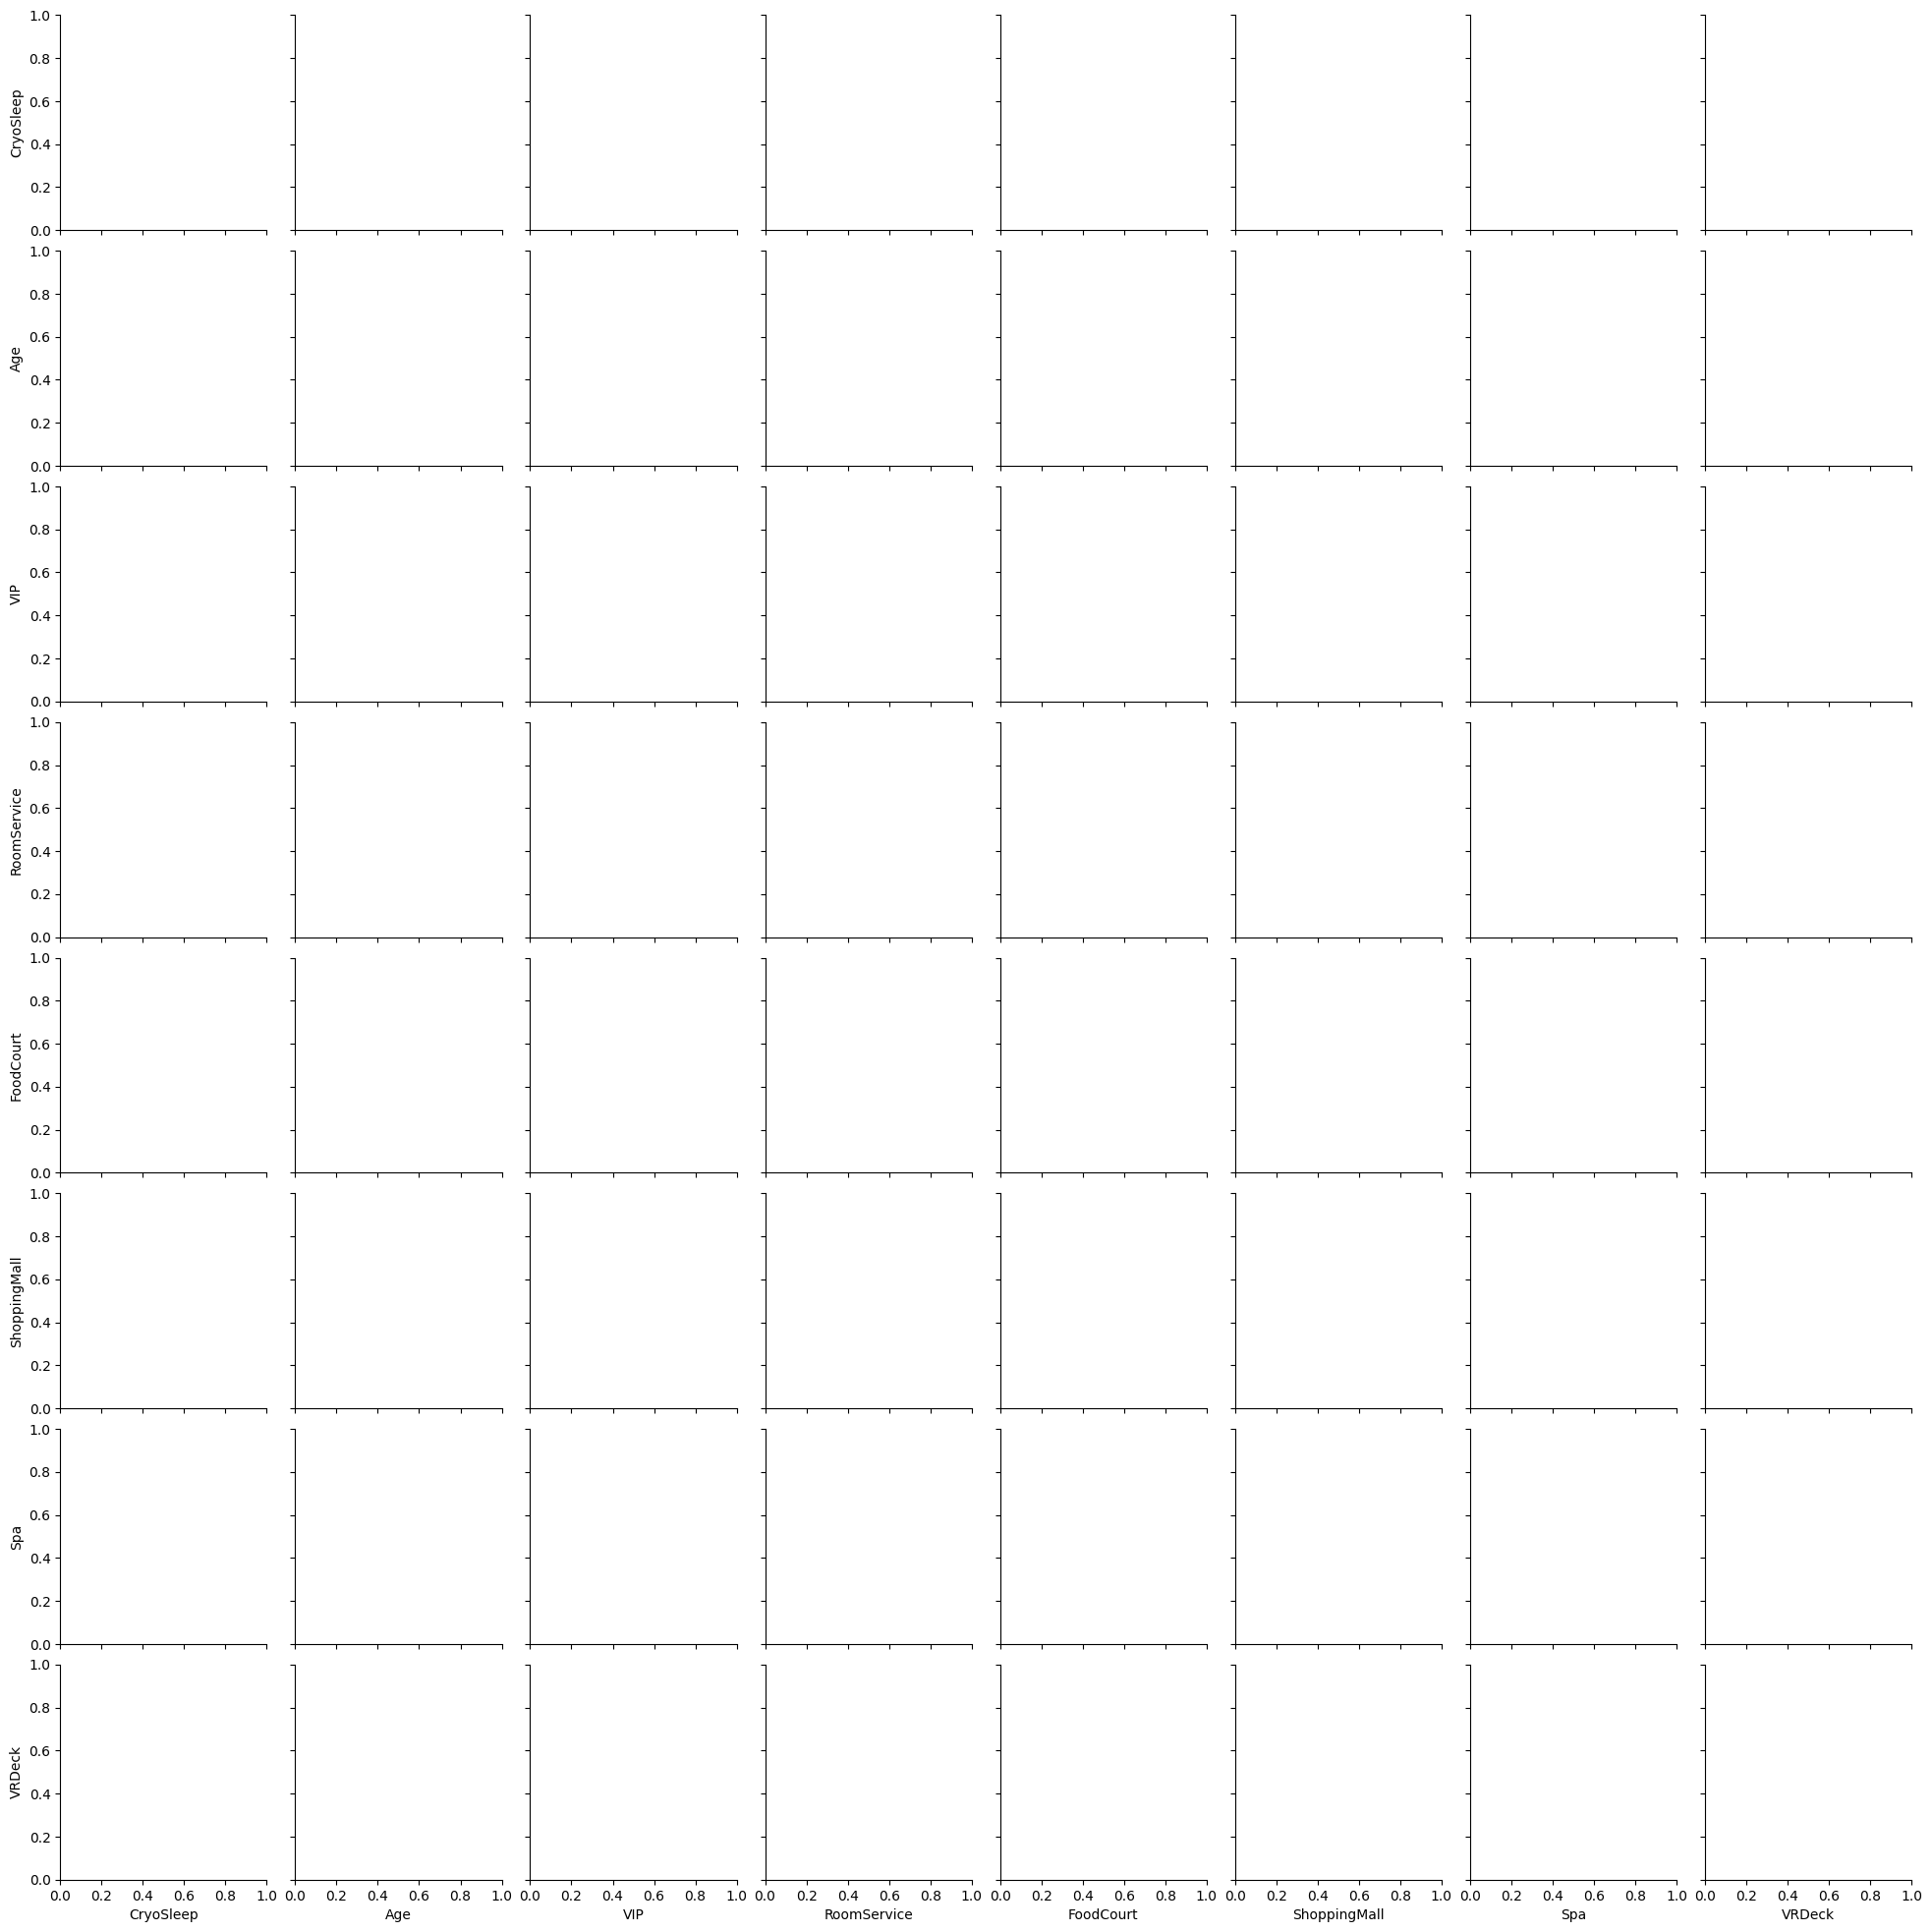

In [105]:
sns.pairplot(train_data_sea, hue='Transported')

<AxesSubplot:>

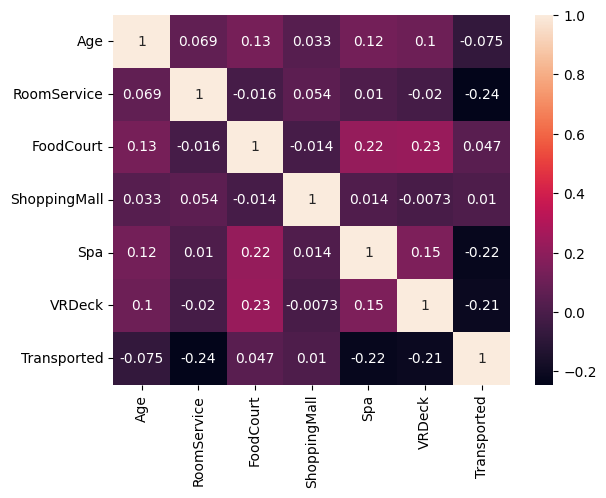

In [106]:
sns.heatmap(train_data_sea.corr(), annot=True)

In [107]:
from keras import Sequential
from keras.layers import Dense

In [157]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal', input_dim=15))
#Second  Hidden Layer
classifier.add(Dense(12, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [189]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=10, epochs=1000)

Epoch 1/1000
696/696 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.7947
Epoch 2/1000
696/696 [==============================] - 1s 951us/step - loss: 0.4337 - accuracy: 0.7975
Epoch 3/1000
696/696 [==============================] - 1s 937us/step - loss: 0.4376 - accuracy: 0.7951
Epoch 4/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4342 - accuracy: 0.7984
Epoch 5/1000
696/696 [==============================] - 1s 931us/step - loss: 0.4365 - accuracy: 0.7958
Epoch 6/1000
696/696 [==============================] - 1s 936us/step - loss: 0.4349 - accuracy: 0.7977
Epoch 7/1000
696/696 [==============================] - 1s 929us/step - loss: 0.4357 - accuracy: 0.7975
Epoch 8/1000
696/696 [==============================] - 1s 927us/step - loss: 0.4341 - accuracy: 0.7947
Epoch 9/1000
696/696 [==============================] - 1s 927us/step - loss: 0.4348 - accuracy: 0.7932
Epoch 10/1000
696/696 [==============================] - 1s 922us/

696/696 [==============================] - 1s 918us/step - loss: 0.4356 - accuracy: 0.7919
Epoch 80/1000
696/696 [==============================] - 1s 914us/step - loss: 0.4322 - accuracy: 0.7957
Epoch 81/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4332 - accuracy: 0.7984
Epoch 82/1000
696/696 [==============================] - 1s 920us/step - loss: 0.4361 - accuracy: 0.7949
Epoch 83/1000
696/696 [==============================] - 1s 921us/step - loss: 0.4347 - accuracy: 0.7962
Epoch 84/1000
696/696 [==============================] - 1s 939us/step - loss: 0.4364 - accuracy: 0.7941
Epoch 85/1000
696/696 [==============================] - 1s 921us/step - loss: 0.4392 - accuracy: 0.7951
Epoch 86/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4355 - accuracy: 0.7958
Epoch 87/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4343 - accuracy: 0.7964
Epoch 88/1000
696/696 [==============================] - 1s 919us/ste

696/696 [==============================] - 1s 936us/step - loss: 0.4335 - accuracy: 0.7944
Epoch 157/1000
696/696 [==============================] - 1s 925us/step - loss: 0.4316 - accuracy: 0.8001
Epoch 158/1000
696/696 [==============================] - 1s 931us/step - loss: 0.4361 - accuracy: 0.7932
Epoch 159/1000
696/696 [==============================] - 1s 921us/step - loss: 0.4338 - accuracy: 0.7949
Epoch 160/1000
696/696 [==============================] - 1s 922us/step - loss: 0.4336 - accuracy: 0.7959
Epoch 161/1000
696/696 [==============================] - 1s 935us/step - loss: 0.4356 - accuracy: 0.7911
Epoch 162/1000
696/696 [==============================] - 1s 934us/step - loss: 0.4332 - accuracy: 0.7962
Epoch 163/1000
696/696 [==============================] - 1s 931us/step - loss: 0.4334 - accuracy: 0.7978
Epoch 164/1000
696/696 [==============================] - 1s 963us/step - loss: 0.4378 - accuracy: 0.7945
Epoch 165/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 912us/step - loss: 0.4329 - accuracy: 0.7972
Epoch 234/1000
696/696 [==============================] - 1s 934us/step - loss: 0.4328 - accuracy: 0.7931
Epoch 235/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4327 - accuracy: 0.7928
Epoch 236/1000
696/696 [==============================] - 1s 909us/step - loss: 0.4333 - accuracy: 0.7959
Epoch 237/1000
696/696 [==============================] - 1s 906us/step - loss: 0.4340 - accuracy: 0.7968
Epoch 238/1000
696/696 [==============================] - 1s 908us/step - loss: 0.4320 - accuracy: 0.7957
Epoch 239/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4316 - accuracy: 0.7961
Epoch 240/1000
696/696 [==============================] - 1s 917us/step - loss: 0.4313 - accuracy: 0.7947
Epoch 241/1000
696/696 [==============================] - 1s 912us/step - loss: 0.4316 - accuracy: 0.7971
Epoch 242/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 917us/step - loss: 0.4302 - accuracy: 0.7951
Epoch 311/1000
696/696 [==============================] - 1s 927us/step - loss: 0.4314 - accuracy: 0.7987
Epoch 312/1000
696/696 [==============================] - 1s 918us/step - loss: 0.4337 - accuracy: 0.7955
Epoch 313/1000
696/696 [==============================] - 1s 921us/step - loss: 0.4330 - accuracy: 0.7915
Epoch 314/1000
696/696 [==============================] - 1s 934us/step - loss: 0.4303 - accuracy: 0.7961
Epoch 315/1000
696/696 [==============================] - 1s 933us/step - loss: 0.4307 - accuracy: 0.7987
Epoch 316/1000
696/696 [==============================] - 1s 921us/step - loss: 0.4308 - accuracy: 0.7980
Epoch 317/1000
696/696 [==============================] - 1s 925us/step - loss: 0.4317 - accuracy: 0.7988
Epoch 318/1000
696/696 [==============================] - 1s 934us/step - loss: 0.4305 - accuracy: 0.7981
Epoch 319/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 923us/step - loss: 0.4334 - accuracy: 0.7955
Epoch 388/1000
696/696 [==============================] - 1s 923us/step - loss: 0.4311 - accuracy: 0.7970
Epoch 389/1000
696/696 [==============================] - 1s 911us/step - loss: 0.4304 - accuracy: 0.7967
Epoch 390/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4308 - accuracy: 0.7967
Epoch 391/1000
696/696 [==============================] - 1s 909us/step - loss: 0.4316 - accuracy: 0.7925
Epoch 392/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4319 - accuracy: 0.7978
Epoch 393/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4293 - accuracy: 0.7929
Epoch 394/1000
696/696 [==============================] - 1s 913us/step - loss: 0.4294 - accuracy: 0.7944
Epoch 395/1000
696/696 [==============================] - 1s 917us/step - loss: 0.4311 - accuracy: 0.7944
Epoch 396/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 920us/step - loss: 0.4298 - accuracy: 0.7994
Epoch 465/1000
696/696 [==============================] - 1s 916us/step - loss: 0.4279 - accuracy: 0.7975
Epoch 466/1000
696/696 [==============================] - 1s 923us/step - loss: 0.4297 - accuracy: 0.7955
Epoch 467/1000
696/696 [==============================] - 1s 938us/step - loss: 0.4296 - accuracy: 0.7998
Epoch 468/1000
696/696 [==============================] - 1s 962us/step - loss: 0.4287 - accuracy: 0.7965
Epoch 469/1000
696/696 [==============================] - 1s 940us/step - loss: 0.4290 - accuracy: 0.7947
Epoch 470/1000
696/696 [==============================] - 1s 913us/step - loss: 0.4297 - accuracy: 0.7961
Epoch 471/1000
696/696 [==============================] - 1s 941us/step - loss: 0.4278 - accuracy: 0.8005
Epoch 472/1000
696/696 [==============================] - 1s 928us/step - loss: 0.4284 - accuracy: 0.7974
Epoch 473/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 916us/step - loss: 0.4269 - accuracy: 0.7952
Epoch 542/1000
696/696 [==============================] - 1s 906us/step - loss: 0.4265 - accuracy: 0.7984
Epoch 543/1000
696/696 [==============================] - 1s 911us/step - loss: 0.4296 - accuracy: 0.7959
Epoch 544/1000
696/696 [==============================] - 1s 910us/step - loss: 0.4267 - accuracy: 0.7970
Epoch 545/1000
696/696 [==============================] - 1s 913us/step - loss: 0.4297 - accuracy: 0.7954
Epoch 546/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4275 - accuracy: 0.7952
Epoch 547/1000
696/696 [==============================] - 1s 919us/step - loss: 0.4290 - accuracy: 0.7951
Epoch 548/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4328 - accuracy: 0.7961
Epoch 549/1000
696/696 [==============================] - 1s 927us/step - loss: 0.4285 - accuracy: 0.7955
Epoch 550/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 922us/step - loss: 0.4267 - accuracy: 0.8003
Epoch 619/1000
696/696 [==============================] - 1s 914us/step - loss: 0.4296 - accuracy: 0.7962
Epoch 620/1000
696/696 [==============================] - 1s 913us/step - loss: 0.4277 - accuracy: 0.7982
Epoch 621/1000
696/696 [==============================] - 1s 947us/step - loss: 0.4282 - accuracy: 0.7974
Epoch 622/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4301 - accuracy: 0.7938
Epoch 623/1000
696/696 [==============================] - 1s 923us/step - loss: 0.4268 - accuracy: 0.7962
Epoch 624/1000
696/696 [==============================] - 1s 935us/step - loss: 0.4266 - accuracy: 0.8003
Epoch 625/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4277 - accuracy: 0.7981
Epoch 626/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4298 - accuracy: 0.7959
Epoch 627/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 914us/step - loss: 0.4250 - accuracy: 0.7971
Epoch 696/1000
696/696 [==============================] - 1s 906us/step - loss: 0.4293 - accuracy: 0.7957
Epoch 697/1000
696/696 [==============================] - 1s 1ms/step - loss: 0.4264 - accuracy: 0.7970
Epoch 698/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4301 - accuracy: 0.7958
Epoch 699/1000
696/696 [==============================] - 1s 925us/step - loss: 0.4246 - accuracy: 0.7990
Epoch 700/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4301 - accuracy: 0.7990
Epoch 701/1000
696/696 [==============================] - 1s 940us/step - loss: 0.4263 - accuracy: 0.7990
Epoch 702/1000
696/696 [==============================] - 1s 938us/step - loss: 0.4301 - accuracy: 0.7948
Epoch 703/1000
696/696 [==============================] - 1s 914us/step - loss: 0.4260 - accuracy: 0.7947
Epoch 704/1000
696/696 [==============================] - 1s 92

696/696 [==============================] - 1s 921us/step - loss: 0.4239 - accuracy: 0.7957
Epoch 773/1000
696/696 [==============================] - 1s 931us/step - loss: 0.4257 - accuracy: 0.7978
Epoch 774/1000
696/696 [==============================] - 1s 924us/step - loss: 0.4292 - accuracy: 0.7978
Epoch 775/1000
696/696 [==============================] - 1s 927us/step - loss: 0.4267 - accuracy: 0.7962
Epoch 776/1000
696/696 [==============================] - 1s 932us/step - loss: 0.4253 - accuracy: 0.7987
Epoch 777/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4246 - accuracy: 0.8000
Epoch 778/1000
696/696 [==============================] - 1s 914us/step - loss: 0.4256 - accuracy: 0.7949
Epoch 779/1000
696/696 [==============================] - 1s 937us/step - loss: 0.4258 - accuracy: 0.7984
Epoch 780/1000
696/696 [==============================] - 1s 930us/step - loss: 0.4260 - accuracy: 0.7951
Epoch 781/1000
696/696 [==============================] - 1s 

696/696 [==============================] - 1s 908us/step - loss: 0.4265 - accuracy: 0.7987
Epoch 850/1000
696/696 [==============================] - 1s 899us/step - loss: 0.4250 - accuracy: 0.7965
Epoch 851/1000
696/696 [==============================] - 1s 908us/step - loss: 0.4242 - accuracy: 0.7987
Epoch 852/1000
696/696 [==============================] - 1s 911us/step - loss: 0.4268 - accuracy: 0.7949
Epoch 853/1000
696/696 [==============================] - 1s 901us/step - loss: 0.4257 - accuracy: 0.7958
Epoch 854/1000
696/696 [==============================] - 1s 909us/step - loss: 0.4255 - accuracy: 0.7980
Epoch 855/1000
696/696 [==============================] - 1s 911us/step - loss: 0.4214 - accuracy: 0.8008
Epoch 856/1000
696/696 [==============================] - 1s 914us/step - loss: 0.4265 - accuracy: 0.7957
Epoch 857/1000
696/696 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.7965
Epoch 858/1000
696/696 [==============================] - 1s 1m

696/696 [==============================] - 1s 932us/step - loss: 0.4270 - accuracy: 0.7947
Epoch 927/1000
696/696 [==============================] - 1s 909us/step - loss: 0.4257 - accuracy: 0.7990
Epoch 928/1000
696/696 [==============================] - 1s 911us/step - loss: 0.4239 - accuracy: 0.7951
Epoch 929/1000
696/696 [==============================] - 1s 917us/step - loss: 0.4247 - accuracy: 0.7975
Epoch 930/1000
696/696 [==============================] - 1s 912us/step - loss: 0.4276 - accuracy: 0.7942
Epoch 931/1000
696/696 [==============================] - 1s 909us/step - loss: 0.4252 - accuracy: 0.7964
Epoch 932/1000
696/696 [==============================] - 1s 915us/step - loss: 0.4271 - accuracy: 0.7981
Epoch 933/1000
696/696 [==============================] - 1s 931us/step - loss: 0.4263 - accuracy: 0.7977
Epoch 934/1000
696/696 [==============================] - 1s 906us/step - loss: 0.4227 - accuracy: 0.7995
Epoch 935/1000
696/696 [==============================] - 1s 

In [145]:
X_train.shape

(6954, 15)

In [160]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

218/218 [==============================] - 0s 784us/step - loss: 0.4434 - accuracy: 0.7925


[0.4434213638305664, 0.7924935221672058]

In [164]:
y_pred=classifier.predict(test_data)

134/134 [==============================] - 0s 702us/step


In [165]:
y_pred =(y_pred>0.5)

In [166]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [153]:
y_train

7503    1.0
7300    1.0
1853    1.0
5962    1.0
4805    1.0
       ... 
278     1.0
3714    0.0
7409    1.0
3325    1.0
5787    1.0
Name: Transported, Length: 6954, dtype: float64

In [167]:
result = pd.read_csv('test.csv')
df_result = pd.DataFrame(columns=['PassengerId', 'Transported'])
df_result['PassengerId'] = result['PassengerId']
df_result['Transported'] = y_pred

In [168]:
df_result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [169]:
df_result.to_csv('submission.csv', index=False)